In [ ]:
import numpy as np
# temp_list = np.array(range(255))
# print(temp_list)
# print(temp_list / 255.0)

In [2]:
# 신경망 모델의 시각화 및 소실 곡선 - 최적화된값을 찾기위함

In [3]:
from tensorflow import keras
(x,y),(xt,yt) =  keras.datasets.fashion_mnist.load_data()
x.shape, y.shape, xt.shape,yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# 데이터 표준화 0 ~ 1
# x_scaled = x / 255.0
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_2d = x.reshape(-1,28*28)
x_scaled =  ss.fit_transform(x_2d)
x_scaled.shape

(60000, 784)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_target,y_train,y_target =  train_test_split(x_scaled,y)
x_train.shape,x_target.shape,y_train.shape,y_target.shape

((45000, 784), (15000, 784), (45000,), (15000,))

In [6]:
# 신경망 모델을 만드는 함수를 작성
def make_model(layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28*28,)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if layer:
        model.add(layer)
    model.add(keras.layers.Dense(10,activation = 'softmax'))
    return model

In [7]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history =  model.fit(x_train,y_train, epochs=5,verbose=0)

In [10]:
history.history

{'loss': [0.4604197144508362,
  0.33918026089668274,
  0.2986326515674591,
  0.27267810702323914,
  0.2500283122062683],
 'accuracy': [0.8348666429519653,
  0.8777555823326111,
  0.8904444575309753,
  0.8990222215652466,
  0.9077777862548828]}

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

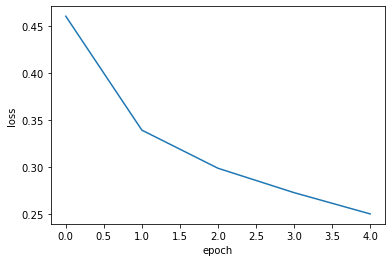

In [12]:
import matplotlib.pyplot as plt
list_temp = history.history['loss']
plt.plot(list_temp)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

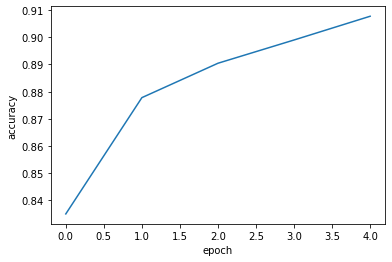

In [13]:
# 정확도
list_temp = history.history['accuracy']
plt.plot(list_temp)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [14]:
# epoch 늘리면?  25
model = make_model()
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history =  model.fit(x_train,y_train, epochs=25,verbose=0)

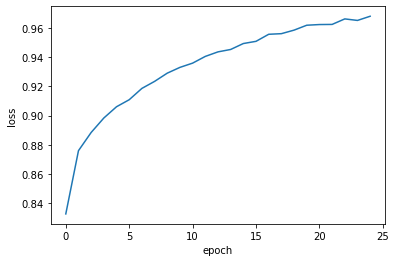

In [15]:
list_temp = history.history['accuracy']
plt.plot(list_temp)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
# 위에서는 학습데이터를 기반으로한 손실율과 정확성을 봤는데... 과적합을 보기위해서는
# target에 대한 검증 데이터도 필요
model = make_model()
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history =  model.fit(x_train,y_train, epochs=25,verbose=0, validation_data=(x_target,y_target))

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

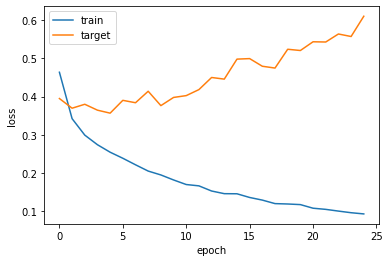

In [18]:
train_loss = history.history['loss']
target_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(target_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','target'])
plt.show()

In [ ]:
# 인공신경망에서 사용하는 규제 알고리즘..... 드랍아웃....
# Drop - out
# 일부 출력의 뉴런의 결과를 0으로만든다.... 특정뉴런에 과하게 의존하는걸 막는걸 발견
model = make_model(keras.layers.Dropout(0.3))
print(model.summary())
# 일부 뉴런의 층을 0으로 만들지만 전체 구조는 변경하지 않는다
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history =  model.fit(x_train,y_train, epochs=25,verbose=1, validation_data=(x_target,y_target),verbose=0)

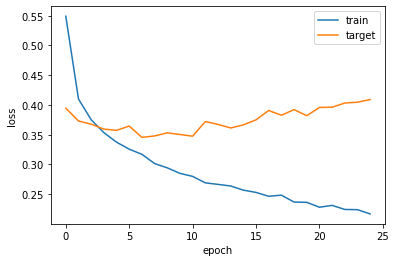

In [20]:
train_loss = history.history['loss']
target_loss = history.history['val_loss']
plt.plot(train_loss)
plt.plot(target_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','target'])
plt.show()

In [21]:
model = make_model(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=7,verbose=0, validation_data=(x_target,y_target))
model.evaluate(x_target,y_target)

469/469 [==============================] - 0s 790us/step - loss: 0.3540 - accuracy: 0.8777


[0.35402512550354004, 0.8776666522026062]

In [22]:
model.save_weights('model-weight.h5')  # 모델의 파라메터를 저장..... 하이퍼 파라메터

In [23]:
model.save('model-whoile.h5') #모델 구조와 파라메터를 같이 저장

In [24]:
# 모델객체를 만든다  Sequencial 
# 레이어 구성을 한다 model.add(keras.layer.Dense) or Dropout
# 모델을 compile 
# 모델을 적용(훈련세트) or 검증세트   model.fit

In [29]:
# 주의점.... 모델을 만들때 저장된 파라메터를 불러올수 있는데.... 이때 이전에 저장했던 모델과 정확히 같아야한다.
# 저장된 파라메터를 불러오기
model =  make_model(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.evaluate(x_target, y_target)
# 파라메터 적용해서 모델 구성

469/469 [==============================] - 1s 865us/step - loss: 0.3540 - accuracy: 0.8777


[0.35402512550354004, 0.8776666522026062]

In [26]:
# 저장된 모델을 불러오기
model2 = keras.models.load_model('model-whoile.h5')
model2.evaluate(x_target,y_target)

469/469 [==============================] - 0s 749us/step - loss: 0.3540 - accuracy: 0.8777


[0.35402512550354004, 0.8776666522026062]

In [30]:
# 콜백 , 조기종료
# fit() 메서드의 callbacks 매개변수에 리스트로 전달
# ModelcheckPoint 콜백.... 지정된 에포크 횟수동안 최상의 검증 점수를 만드는 모델을 저장

In [ ]:
# ModelCheckpoint 기본적으로 최상의 검증 점수를 만들어서 h5로 저장한다.
model = make_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
checkpoint= keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(x_train,y_train, epochs=25, validation_data=(x_target,y_target),verbose=0,
         callbacks=[checkpoint])

In [41]:
# 조기종료..모델이 과적합이 될거 같으면 종료한다.... 일종의 규제방법중에 하나... 
# 조기종료해 주는 콜백이 존재함
# EarlyStopping 하고.. ModelCheckpoint 를 같이 사용하면 가장 낮은 검증손실의 모델을 파일에 저장하고 
# 검즘손실이 다시 상승할때 훈련을 중지, 현재 모델의 파라메터를 최상의 파라메터로 전환한다. 
model = make_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
checkpoint= keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(restore_best_weights=True ,patience=2)
history =  model.fit(x_train,y_train, epochs=25, validation_data=(x_target,y_target), verbose=0,
         callbacks=[checkpoint,early_stopping])

In [39]:
early_stopping.stopped_epoch

8

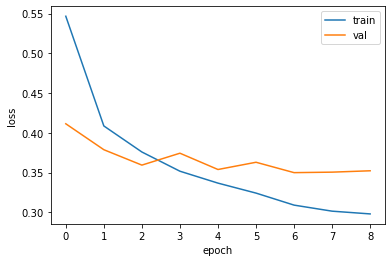

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [44]:
model.evaluate(x_target,y_target)

469/469 [==============================] - 0s 910us/step - loss: 0.3499 - accuracy: 0.8803


[0.34985244274139404, 0.8803333044052124]